In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
players = pd.read_csv("../data/fifa_22_player/players_22.csv")
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [6]:
players = players.dropna(subset=features)

In [7]:
data = players[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


#### Steps
1. Scale the data
2. Randomly select centroids (means)
3. Assign each data points to their closed centroid
4. Updated the centroids of the newly formed clusters
5. Repeats steps 3 and 4 until the same centoids (convergences)

In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [9]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
overall,19165.0,4.670472,1.346635,1.0,3.739130,4.717391,5.500000,10.0
potential,19165.0,5.319998,1.191076,1.0,4.521739,5.304348,6.086957,10.0
wage_eur,19165.0,1.219443,0.501528,1.0,1.012876,1.064378,1.193133,10.0
value_eur,19165.0,1.131826,0.353229,1.0,1.021620,1.044817,1.092370,10.0
age,19165.0,4.063345,1.575838,1.0,2.666667,4.000000,5.333333,10.0


In [10]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [11]:
# Getting one random centroid from the data
centroid = data.apply(lambda x: float(x.sample())) # float 
centroid

overall      6.478261
potential    5.108696
wage_eur     1.012876
value_eur    1.055255
age          5.000000
dtype: float64

In [12]:
# Randomly select centroids 
def random_centroids(data, K):
    centroids = []
    for k_i in range(K):
        centroid = data.apply(lambda x: float(x.sample())) # float 
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
    
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,5.695652,6.478261,2.565217,7.847826,3.543478
potential,5.304348,6.478261,2.565217,4.717391,7.456522
wage_eur,1.141631,1.321888,1.785408,2.300429,1.038627
value_eur,1.015820,1.050616,1.324340,1.028579,1.005614
age,1.333333,3.000000,3.333333,4.000000,4.666667


In [13]:
np.sqrt(((data - centroids.iloc[:, 0]) ** 2).sum(axis=1))

0        12.145971
1        11.642008
2        11.011024
3        11.334212
4        12.711578
           ...    
19234     6.217931
19235     5.293965
19236     5.800581
19237     5.210147
19238     5.210147
Length: 19165, dtype: float64

In [14]:
# Assign each data points to their closest centroid
def assign_cluster_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

cluster_labels = assign_cluster_labels(data, centroids)
cluster_labels[:10]

0    3
1    3
2    3
3    3
4    3
5    3
6    1
7    3
8    3
9    3
dtype: int64

In [15]:
for cluster_label, cluster_data_points in  data.groupby(cluster_labels):
    print(f"Cluster Name: {cluster_label}")
    print(f"Cluster {cluster_label} Data Points\n {cluster_data_points[:2]}\n")

Cluster Name: 0
Cluster 0 Data Points
        overall  potential  wage_eur  value_eur       age
4284  5.695652   5.304348  1.167382    1.09237  2.666667
4285  5.695652   5.304348  1.167382    1.09237  2.666667

Cluster Name: 1
Cluster 1 Data Points
      overall  potential  wage_eur  value_eur  age
6   9.608696  10.000000  6.909871  10.000000  3.0
21  9.217391   9.608696  3.819742   6.543654  3.0

Cluster Name: 2
Cluster 2 Data Points
        overall  potential  wage_eur  value_eur       age
8716  4.717391   4.326087  1.012876   1.041337  4.666667
8759  4.717391   4.326087  1.450644   1.035538  5.000000

Cluster Name: 3
Cluster 3 Data Points
      overall  potential  wage_eur  value_eur       age
0  10.000000   9.608696  9.227468   4.618307  7.000000
1   9.804348   9.413043  7.939914   6.543654  6.333333

Cluster Name: 4
Cluster 4 Data Points
        overall  potential  wage_eur  value_eur       age
1505  6.478261   6.086957  1.012876   1.087731  8.333333
1584  6.478261   6.086957  1.0

In [16]:
# Updated the centroids of the newly formed clusters
def new_centroids(data, labels, K):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

new_centr = new_centroids(data, cluster_labels, 5)
new_centr

,0,1,2,3,4
overall,3.752660,5.573977,3.213091,6.468434,4.715745
potential,5.692962,6.049057,3.939584,6.080005,4.752963
wage_eur,1.037963,1.291040,1.028533,1.714960,1.073417
value_eur,1.039316,1.200666,1.017160,1.295900,1.031542
age,2.264088,3.783737,3.676113,6.101449,5.521029


In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [18]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

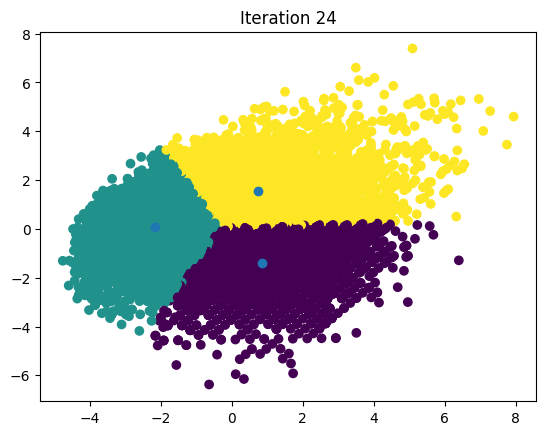

In [19]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()

iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = assign_cluster_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1


In [20]:
centroids

,0,1,2
overall,4.781960,3.205672,5.807503
potential,4.506813,4.930905,6.497870
wage_eur,1.118498,1.028564,1.420500
value_eur,1.044909,1.026655,1.285685
age,5.467648,2.514741,3.598215


In [21]:
labels.value_counts()

0    7191
1    6209
2    5765
Name: count, dtype: int64

In [22]:
players[labels==0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


#### Comparing with Sci-kit learn

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [24]:
kmeans.cluster_centers_

array([[4.80085965, 4.50385518, 1.11288546, 1.0400072 , 5.60892269],
       [3.60070865, 5.20709881, 1.03998962, 1.03584481, 2.71210567],
       [6.23238913, 6.62353016, 1.65767391, 1.41399853, 4.14155537]])

In [25]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,4.800860,3.600709,6.232389
potential,4.503855,5.207099,6.623530
wage_eur,1.112885,1.039990,1.657674
value_eur,1.040007,1.035845,1.413999
age,5.608923,2.712106,4.141555


In [26]:
centroids

,0,1,2
overall,4.781960,3.205672,5.807503
potential,4.506813,4.930905,6.497870
wage_eur,1.118498,1.028564,1.420500
value_eur,1.044909,1.026655,1.285685
age,5.467648,2.514741,3.598215
